In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import scipy.odr as odr
plt.rcParams['figure.figsize'] = [30, 15]

In [3]:
def gaussian_peak(x, A, mu, sigma):
    return A * np.exp(-((x - mu)/sigma)**2)

def fit_gaussian_peak(x, y, p0, sigma=None, full_output=False):
    if sigma is not None:
        fit = curve_fit(gaussian_peak, x, y, p0, sigma=sigma, absolute_sigma=True, full_output=full_output)
    else:
        fit = curve_fit(gaussian_peak, x, y, p0, full_output=full_output)
    return fit

def Reduced_Chisq(x, y, sy, p):
    E = gaussian_peak(x, *p)
    df = len(y) - len(p)
    ChiSq = sum(((y - E)/sy)**2)
    RChisq = ChiSq/df
    print(f"Reduced Chi-squared: {RChisq}, df={df}")

1999
New bin size: 5.125120000000026e-10 s
Rebinned peak: g2 = 1.1222029375000002, t = 1.3613613593750002e-10
Kernel size: 8.008000000000041e-10 s
Moving average peak: g2 = 1.11994362, t = -7.2072072e-11


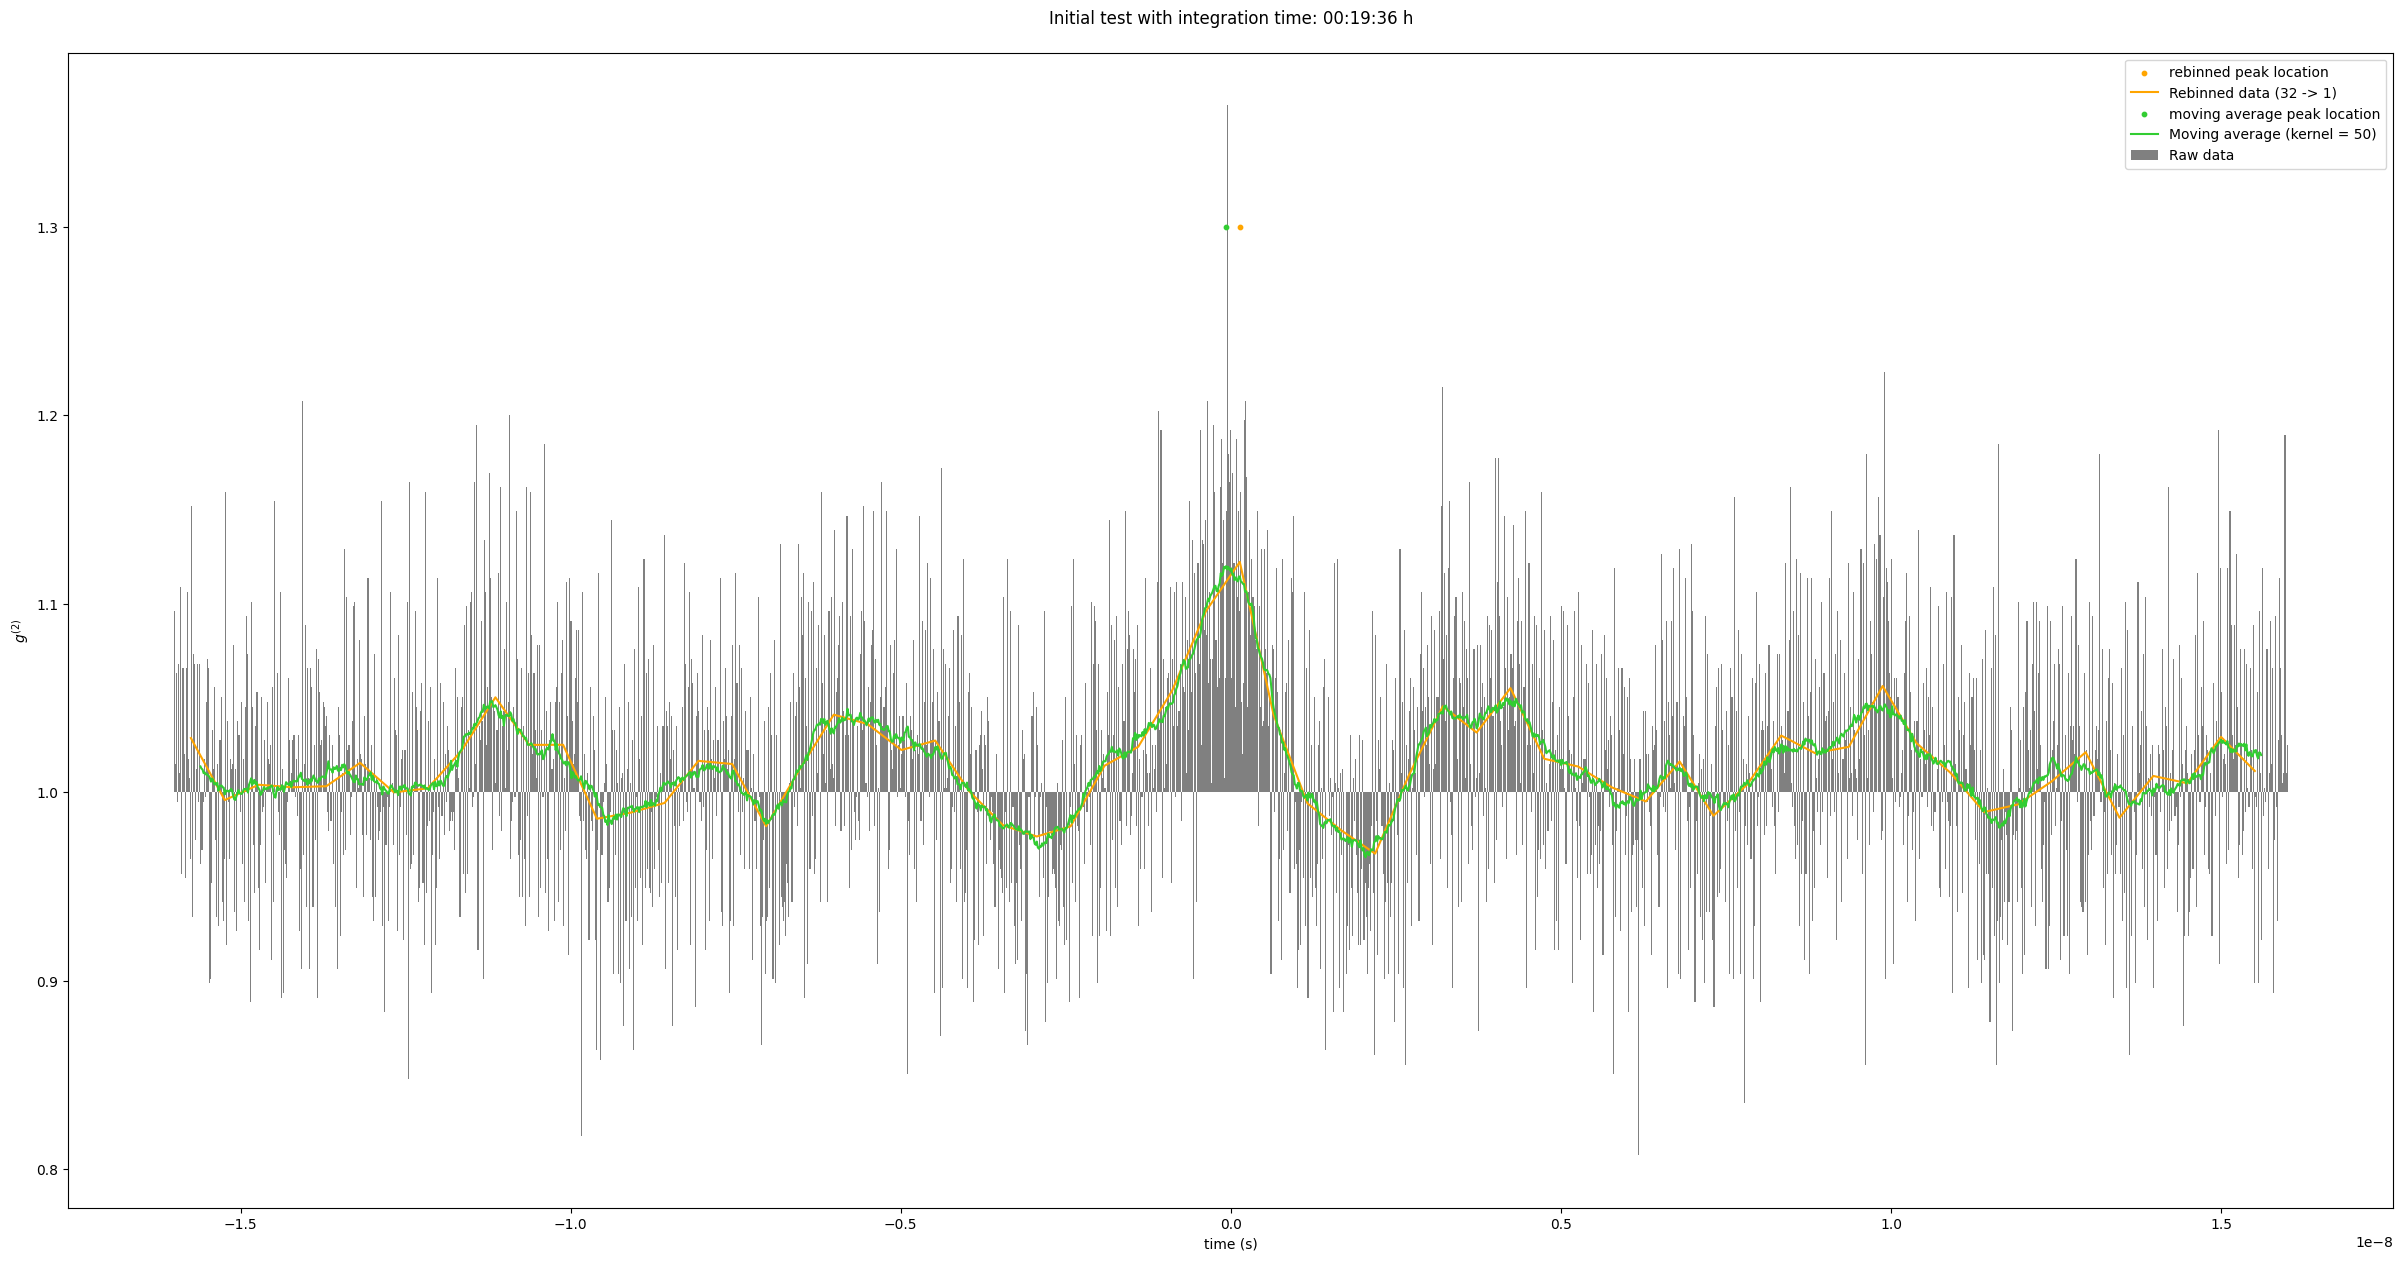

In [ ]:
%matplotlib inline
# Skip the comment lines starting with '#' and read the data
g2dataset = pd.read_csv(r"Experiment 1\G2Functions_0.txt", comment='#', sep=';', header=None, names=["T", "G2"])
g2dataset = g2dataset.to_numpy().T
# Get integration time
with open(r"Experiment 1\G2Functions_0.txt") as f:
    lines = f.readlines()
    integration_time = lines[5][17:]
plt.title(f"Initial test with integration time: {integration_time}")


T = g2dataset[0]
g2 = g2dataset[1]

plt.bar(T, g2-1, T[1] - T[0], bottom=1, label="Raw data", color="grey")

# Rebin data ----------------------------------------------------------
# Rebin to rebin_amount bins
rebin_amount = 32
print(f"New bin size: {rebin_amount*(T[1] - T[0])} s")

# Rebin data
T_rebinned = [sum([T[i+j] for j in range(rebin_amount)]) / rebin_amount for i in range(0, len(T)-(rebin_amount-1), rebin_amount)]
g2_rebinned = [sum([g2[i+j] for j in range(rebin_amount)]) / rebin_amount for i in range(0, len(g2)-(rebin_amount-1), rebin_amount)]

rebinned_peak = find_peaks(g2_rebinned, height = 1.1, prominence=0.1)
plt.scatter([T_rebinned[i] for i in rebinned_peak[0]], 1.3, color="orange", s=10, label = "rebinned peak location")
print(f"Rebinned peak: g2 = {rebinned_peak[1]['peak_heights'][0]}, t = {T_rebinned[rebinned_peak[0][0]]}")

plt.plot(T_rebinned, g2_rebinned, label=f"Rebinned data ({rebin_amount} -> 1)", color="orange")

# Moving average ------------------------------------------------------
# Window size for moving average (e.g., 2 for smoothing over 2 adjacent bins)
window_size = 50
kernel = np.ones(window_size) / window_size
print(f"Kernel size: {window_size*(T[1] - T[0])} s")

# 'valid' gives output only where full windows fit (len = len(g2) - window_size + 1)
g2_moving_avg = np.convolve(g2, kernel, mode='valid')
T_moving_avg = np.convolve(T, kernel, mode='valid')

moving_avg_peak = find_peaks(g2_moving_avg, height = 1.1, prominence=0.1)
plt.scatter([T_moving_avg[i] for i in moving_avg_peak[0]], 1.3, color="limegreen", s=10, label = "moving average peak location")
print(f"Moving average peak: g2 = {moving_avg_peak[1]['peak_heights'][0]}, t = {T_moving_avg[moving_avg_peak[0][0]]}")

plt.plot(T_moving_avg, g2_moving_avg, color="limegreen", label = "Moving average (kernel = 50)")

# plot graph
plt.xlabel("time (s)")
plt.ylabel(r"$g^{(2)}$")
plt.legend()
plt.show()

This is a rubbish dataset, there is so much noise that I have been unable to fit a gaussian peak curve, even with both noise reducing methods

Doing a moving average isn't really as physically representative as a re-binning, and they seem to represent roughly the same peak, so I will just use rebinning. These peaks are found using scipy's find_peaks function

16383
New bin size: 3.124800000000833e-11 s
Rebinned peak: g2 = 1.5184465000000003, t = -7.715785618749999e-11
New bin size: 6.249600000001666e-11 s
Rebinned peak: g2 = 1.41287396875, t = -9.278476378124999e-11
New bin size: 1.249920000000333e-10 s
Rebinned peak: g2 = 1.369072625, t = -6.153094861874999e-11
New bin size: 2.499840000000666e-10 s
Rebinned peak: g2 = 1.3207788437500005, t = -1.2403857891875006e-10
New bin size: 4.999680000001332e-10 s
Rebinned peak: g2 = 1.2727657890625006, t = -2.490538396546876e-10


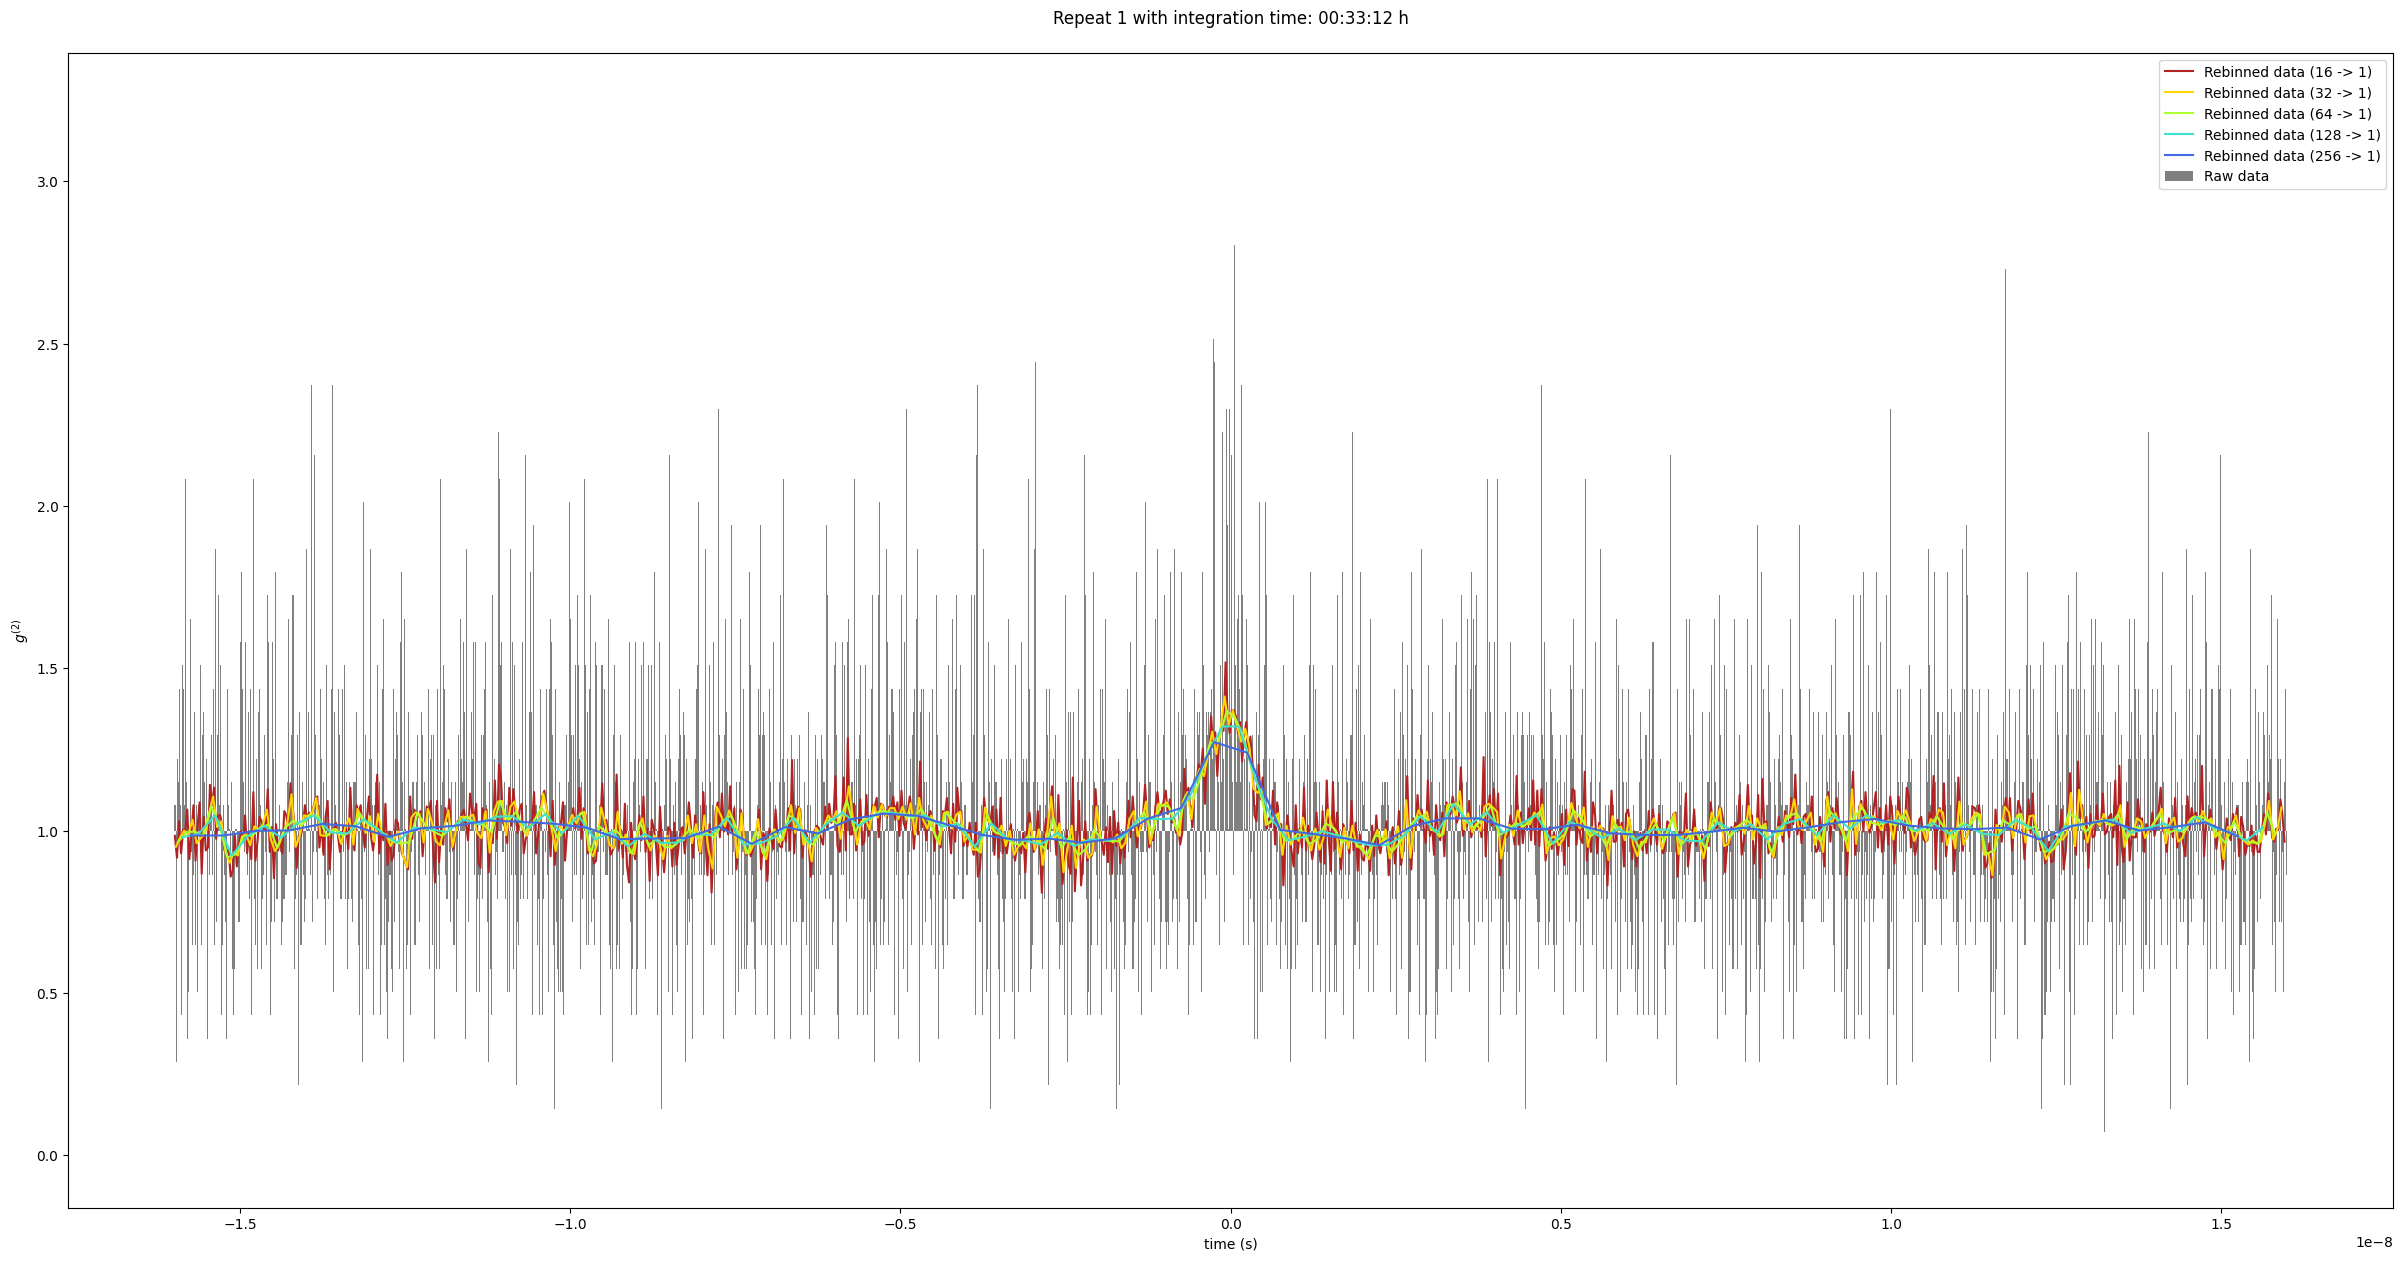

In [5]:
%matplotlib inline
# Skip the comment lines starting with '#' and read the data
g2dataset = pd.read_csv(r"Experiment 1\G2Functions_1.txt", comment='#', sep=';', header=None, names=["T", "G2"])
g2dataset = g2dataset.to_numpy().T
# Get integration time
with open(r"Experiment 1\G2Functions_1.txt") as f:
    lines = f.readlines()
    integration_time_1 = lines[5][17:]
plt.title(f"Repeat 1 with integration time: {integration_time_1}")

T = g2dataset[0]
g2 = g2dataset[1]
print(len(T))

plt.bar(T, g2-1, T[1] - T[0], bottom=1, label="Raw data", color="grey")

# Rebin data ----------------------------------------------------------
# Rebin to rebin_amount bins
for i, (rebin_amount, peak_height) in enumerate(zip([16,32,64,128,256],[1.4,1.4,1.3,1.3,1.2])):
    print(f"New bin size: {rebin_amount*(T[1] - T[0])} s")

    # Rebin data
    T_rebinned = np.array([sum([T[i+j] for j in range(rebin_amount)]) / rebin_amount for i in range(0, len(T)-(rebin_amount-1), rebin_amount)])
    g2_rebinned = np.array([sum([g2[i+j] for j in range(rebin_amount)]) / rebin_amount for i in range(0, len(g2)-(rebin_amount-1), rebin_amount)])

    rebinned_peak = find_peaks(g2_rebinned, height = peak_height, prominence=0.05)
    print(f"Rebinned peak: g2 = {rebinned_peak[1]['peak_heights'][0]}, t = {T_rebinned[rebinned_peak[0][0]]}")

    plt.plot(T_rebinned, g2_rebinned, label=f"Rebinned data ({rebin_amount} -> 1)", color=["firebrick", "gold", "greenyellow", "turquoise", "royalblue"][i])

plt.xlabel("time (s)")
plt.ylabel(r"$g^{(2)}$")
plt.legend()
plt.show()

The choice of rebinning seems to reduce our peak. This isn't good since that means we have introduced a degree of freedom into our data (although you could argue it was already there).

Anyway, choosing 32 -> 1:

New bin size: 6.249600000001666e-11 s
Gaussian fit:
Amplitude: 0.3556969499556463 +- 0.019944464538630555
Centre: -5.1414457845172244e-11 +- 2.1444139168142102e-11
Stdev: 4.68283987061575e-10 +- 3.032659199152162e-11


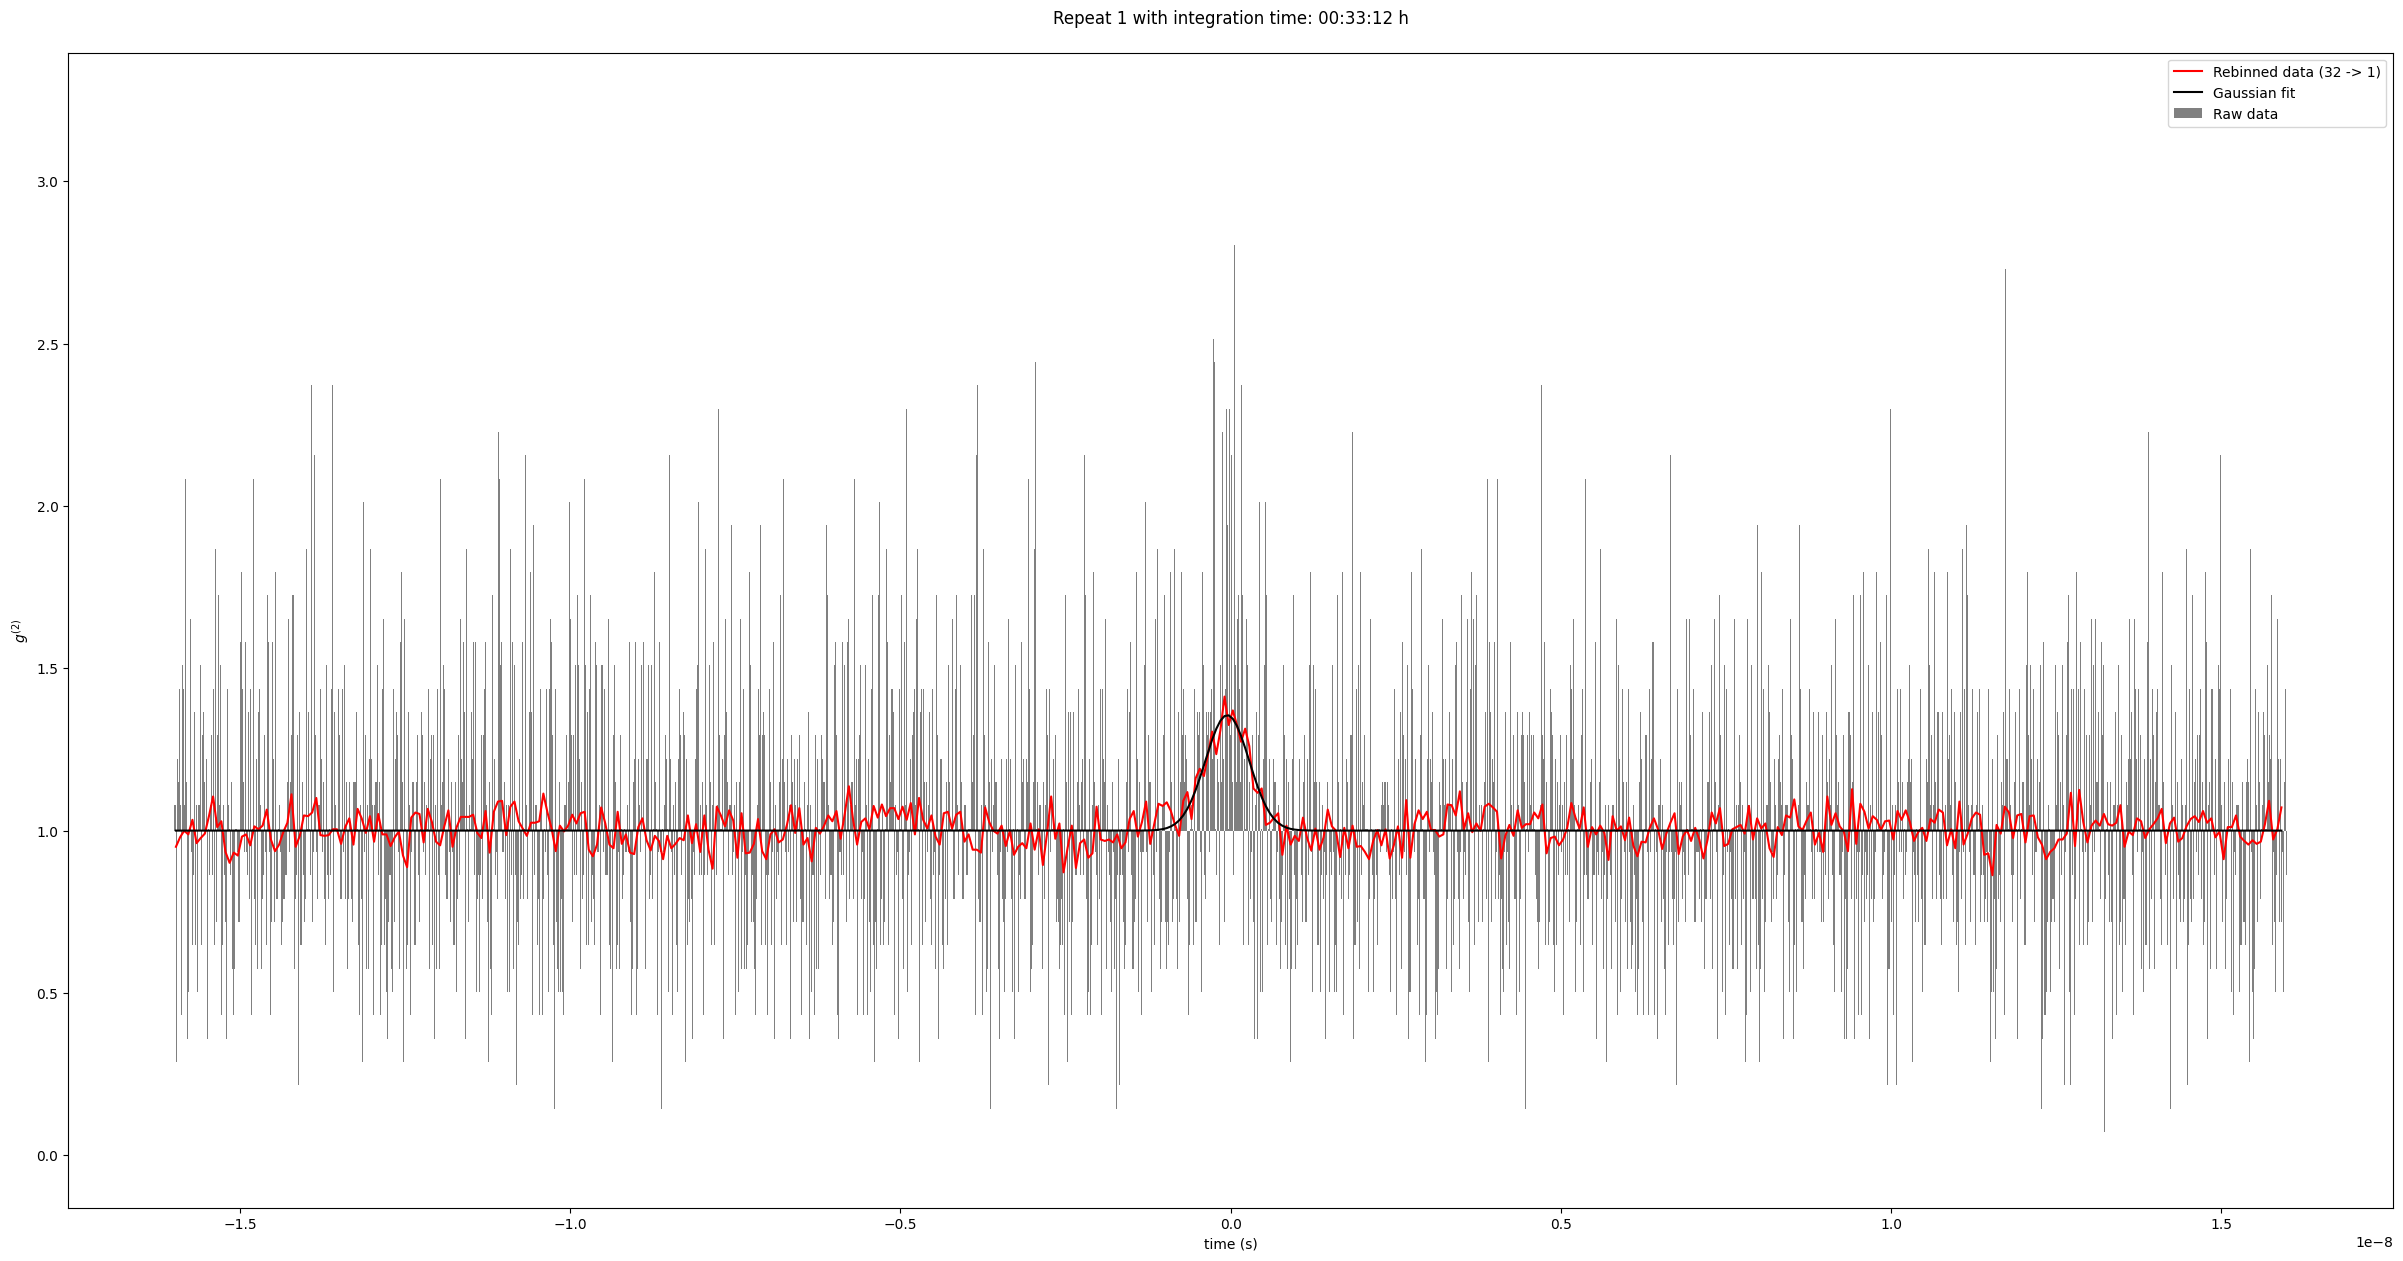

In [6]:
%matplotlib inline
# Skip the comment lines starting with '#' and read the data
g2dataset = pd.read_csv(r"Experiment 1\G2Functions_1.txt", comment='#', sep=';', header=None, names=["T", "G2"])
g2dataset = g2dataset.to_numpy().T
# Get integration time
with open(r"Experiment 1\G2Functions_1.txt") as f:
    lines = f.readlines()
    integration_time_1 = lines[5][17:]
plt.title(f"Repeat 1 with integration time: {integration_time_1}")

T = g2dataset[0]
g2 = g2dataset[1]

plt.bar(T, g2-1, T[1] - T[0], bottom=1, label="Raw data", color="grey")

# Rebin data ----------------------------------------------------------
# Rebin to rebin_amount bins
rebin_amount = 32
print(f"New bin size: {rebin_amount*(T[1] - T[0])} s")

# Rebin data
T_rebinned_1 = np.array([sum([T[i+j] for j in range(rebin_amount)]) / rebin_amount for i in range(0, len(T)-(rebin_amount-1), rebin_amount)])
g2_rebinned_1 = np.array([sum([g2[i+j] for j in range(rebin_amount)]) / rebin_amount for i in range(0, len(g2)-(rebin_amount-1), rebin_amount)])

rebinned_peak = find_peaks(g2_rebinned_1, height = 1.4, prominence=0.1)

plt.plot(T_rebinned_1, g2_rebinned_1, label=f"Rebinned data ({rebin_amount} -> 1)", color="red")

# Gaussian peak fit --------------------------------------------------
p, pcov = fit_gaussian_peak(T_rebinned_1, g2_rebinned_1-1, [.4, T_rebinned_1[rebinned_peak[0][0]], 1e-9])
print(f"Gaussian fit:\nAmplitude: {p[0]} +- {np.sqrt(pcov[0,0])}\nCentre: {p[1]} +- {np.sqrt(pcov[1,1])}\nStdev: {p[2]} +- {np.sqrt(pcov[2,2])}")
plt.plot(T_rebinned_1, gaussian_peak(T_rebinned_1, *p)+1, color="black", label="Gaussian fit")

plt.xlabel("time (s)")
plt.ylabel(r"$g^{(2)}$")
plt.legend()
plt.show()

I am unable to fit a gaussian to the raw data since it is too noisy. Whenever I try, it picks out some random bump in the noise and not the peak we're looking for. So I'm using the rebinned data for the fit. Note that I have specifically chosen 32 -> 1 rebinning because that brings the bin count to 511 which is exactly how many bins there are in the final dataset (so that they are comparable).

Doing this with other datasets:

New bin size: 6.249600000001666e-11 s
Rebinned peak: g2 = 1.43577428125, t = 3.223049689375e-11
Gaussian fit:
Amplitude: 0.39771391583959953 +- 0.013372457531240355
Centre: -2.4985035536339275e-11 +- 1.3119560784978081e-11
Stdev: 4.778743146887828e-10 +- 1.8553859834652927e-11


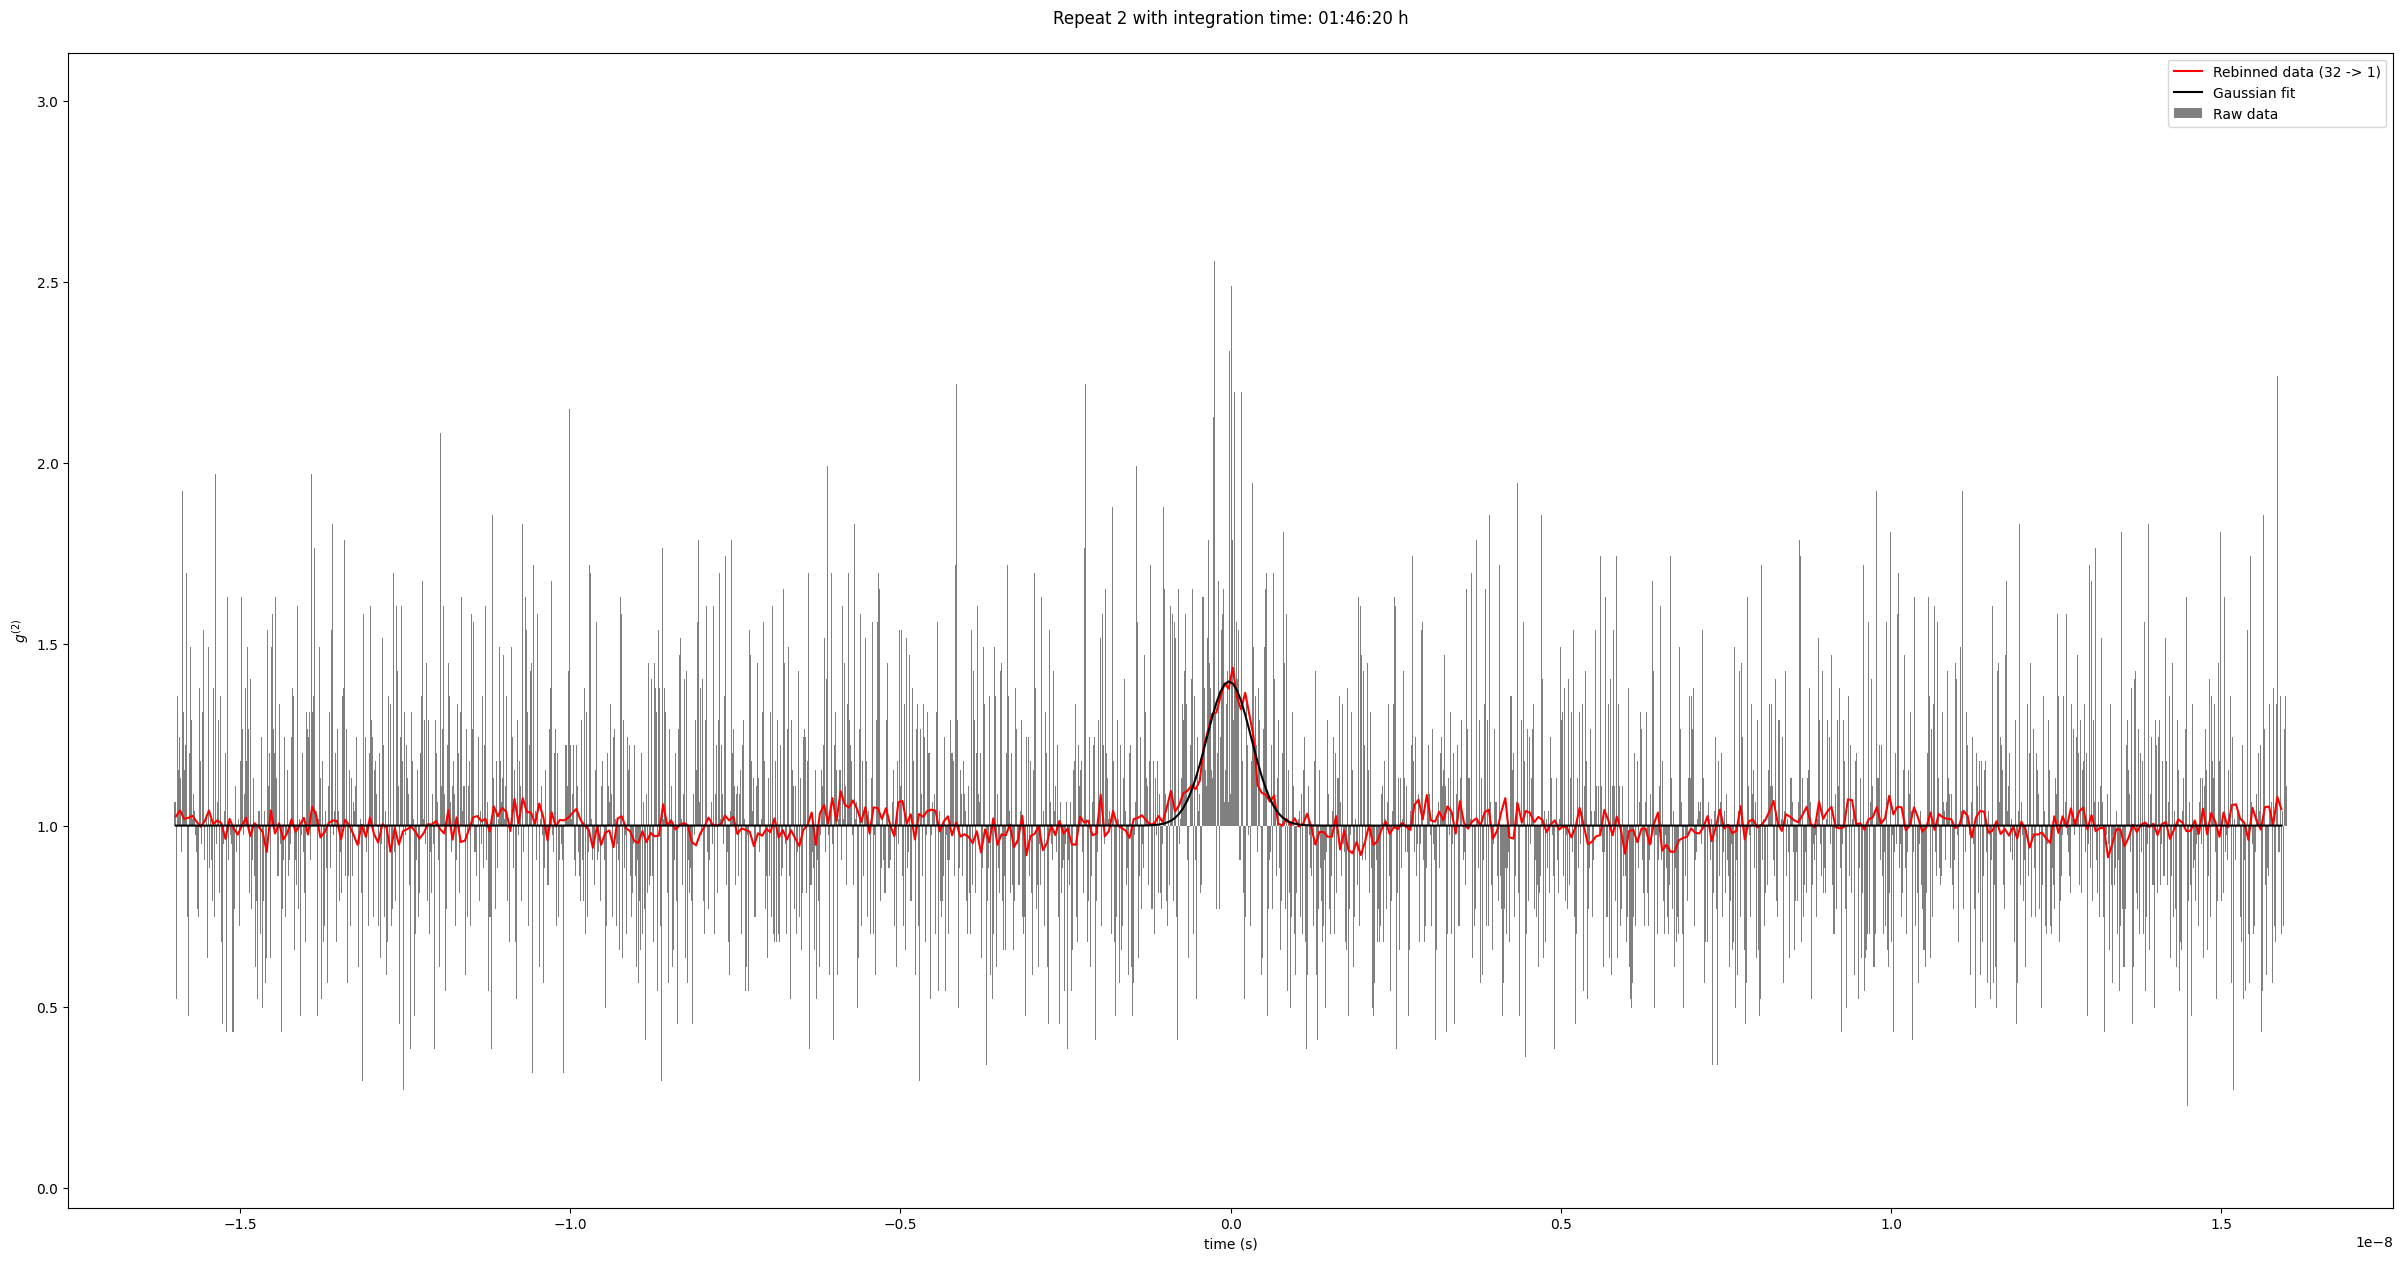

In [7]:
%matplotlib inline
# Skip the comment lines starting with '#' and read the data
g2dataset = pd.read_csv(r"Experiment 1\G2Functions_2.txt", comment='#', sep=';', header=None, names=["T", "G2"])
g2dataset = g2dataset.to_numpy().T
# Get integration time
with open(r"Experiment 1\G2Functions_2.txt") as f:
    lines = f.readlines()
    integration_time_2 = lines[5][17:]
plt.title(f"Repeat 2 with integration time: {integration_time_2}")

T = g2dataset[0]
g2 = g2dataset[1]

plt.bar(T, g2-1, T[1] - T[0], bottom=1, label="Raw data", color="grey")

# Rebin data ----------------------------------------------------------
# Rebin to rebin_amount bins
rebin_amount = 32
print(f"New bin size: {rebin_amount*(T[1] - T[0])} s")

# Rebin data
T_rebinned_2 = np.array([sum([T[i+j] for j in range(rebin_amount)]) / rebin_amount for i in range(0, len(T)-(rebin_amount-1), rebin_amount)])
g2_rebinned_2 = np.array([sum([g2[i+j] for j in range(rebin_amount)]) / rebin_amount for i in range(0, len(g2)-(rebin_amount-1), rebin_amount)])

rebinned_peak = find_peaks(g2_rebinned_2, height = 1.3, prominence=0.1)
print(f"Rebinned peak: g2 = {rebinned_peak[1]['peak_heights'][0]}, t = {T_rebinned_2[rebinned_peak[0][0]]}")

plt.plot(T_rebinned_2, g2_rebinned_2, label=f"Rebinned data ({rebin_amount} -> 1)", color="red")

# Gaussian peak fit --------------------------------------------------
p, pcov = fit_gaussian_peak(T_rebinned_2, g2_rebinned_2-1, [.4, T_rebinned_2[rebinned_peak[0][0]], 1e-9])
print(f"Gaussian fit:\nAmplitude: {p[0]} +- {np.sqrt(pcov[0,0])}\nCentre: {p[1]} +- {np.sqrt(pcov[1,1])}\nStdev: {p[2]} +- {np.sqrt(pcov[2,2])}")
plt.plot(T_rebinned_2, gaussian_peak(T_rebinned_2, *p)+1, color="black", label="Gaussian fit")


plt.xlabel("time (s)")
plt.ylabel(r"$g^{(2)}$")
plt.legend()
plt.show()

New bin size: 6.249600000001666e-11 s
Rebinned peak: g2 = 1.4863345937499999, t = -1.5529239406249997e-10
Gaussian fit:
Amplitude: 0.38482177834098674 +- 0.016636370865429358
Centre: -4.929258461651409e-11 +- 1.7401382644729707e-11
Stdev: 4.929132957310511e-10 +- 2.4609271292177756e-11


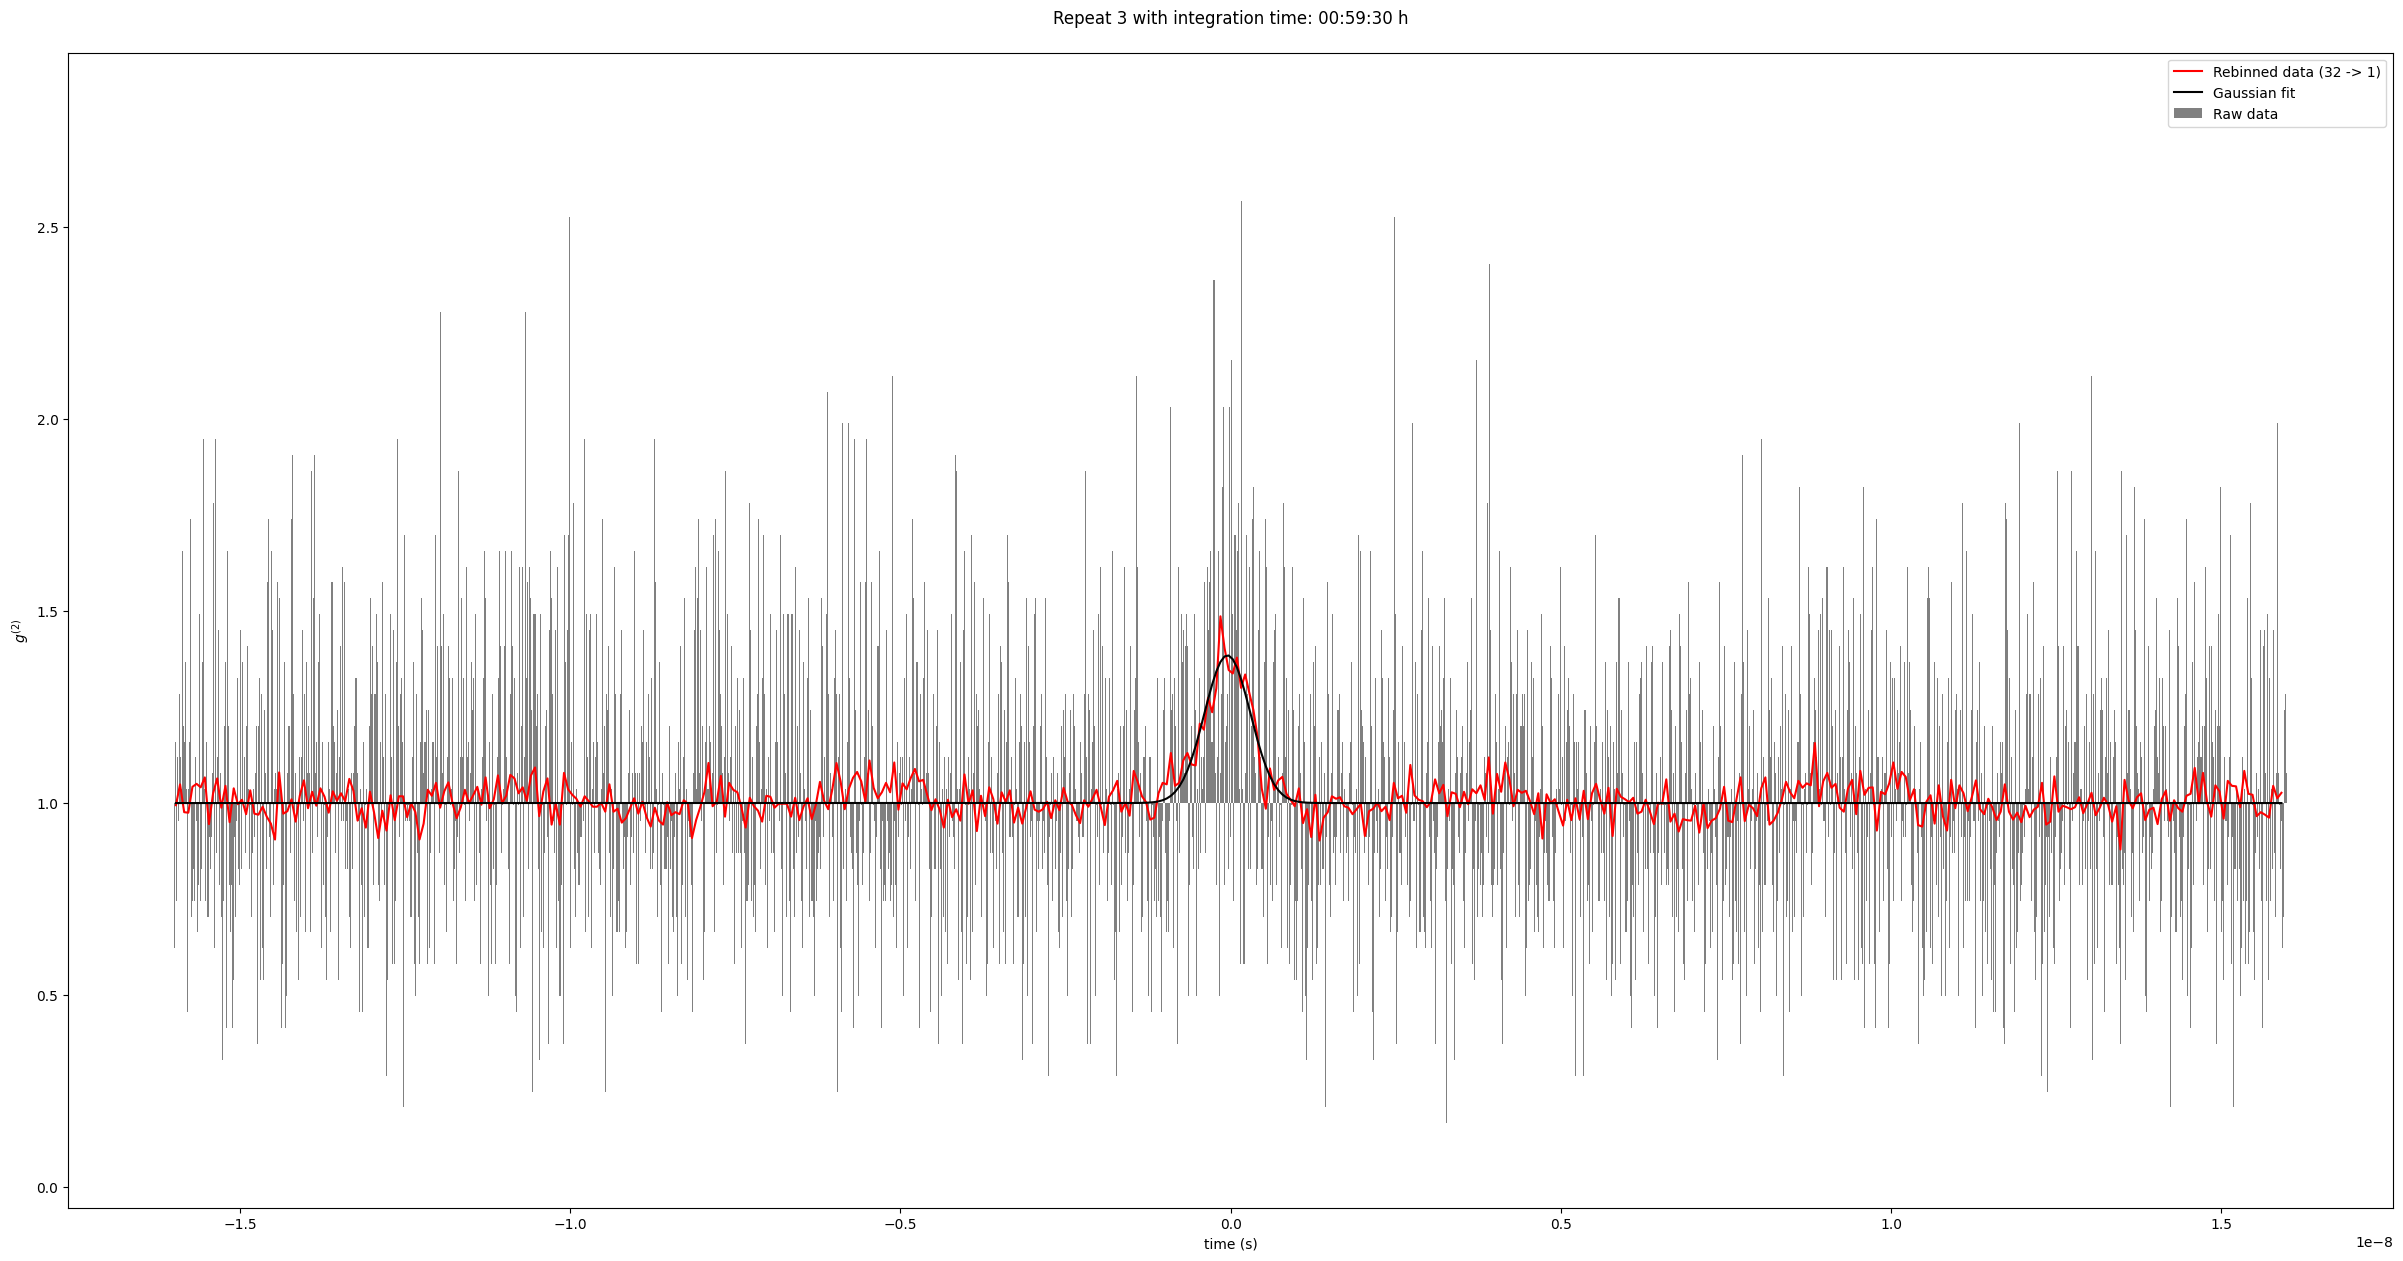

In [8]:
%matplotlib inline
# Skip the comment lines starting with '#' and read the data
g2dataset = pd.read_csv(r"Experiment 1\G2Functions_3.txt", comment='#', sep=';', header=None, names=["T", "G2"])
g2dataset = g2dataset.to_numpy().T
# Get integration time
with open(r"Experiment 1\G2Functions_3.txt") as f:
    lines = f.readlines()
    integration_time_3 = lines[5][17:]
plt.title(f"Repeat 3 with integration time: {integration_time_3}")

T = g2dataset[0]
g2 = g2dataset[1]

plt.bar(T, g2-1, T[1] - T[0], bottom=1, label="Raw data", color="grey")

# Rebin data ----------------------------------------------------------
# Rebin to rebin_amount bins
rebin_amount = 32
print(f"New bin size: {rebin_amount*(T[1] - T[0])} s")

# Rebin data
T_rebinned_3 = np.array([sum([T[i+j] for j in range(rebin_amount)]) / rebin_amount for i in range(0, len(T)-(rebin_amount-1), rebin_amount)])
g2_rebinned_3 = np.array([sum([g2[i+j] for j in range(rebin_amount)]) / rebin_amount for i in range(0, len(g2)-(rebin_amount-1), rebin_amount)])

rebinned_peak = find_peaks(g2_rebinned_3, height = 1.3, prominence=0.1)
print(f"Rebinned peak: g2 = {rebinned_peak[1]['peak_heights'][0]}, t = {T_rebinned_3[rebinned_peak[0][0]]}")

plt.plot(T_rebinned_3, g2_rebinned_3, label=f"Rebinned data ({rebin_amount} -> 1)", color="red")

# Gaussian peak fit --------------------------------------------------
p, pcov = fit_gaussian_peak(T_rebinned_3, g2_rebinned_3-1, [.4, T_rebinned_3[rebinned_peak[0][0]], 1e-9])
print(f"Gaussian fit:\nAmplitude: {p[0]} +- {np.sqrt(pcov[0,0])}\nCentre: {p[1]} +- {np.sqrt(pcov[1,1])}\nStdev: {p[2]} +- {np.sqrt(pcov[2,2])}")
plt.plot(T_rebinned_3, gaussian_peak(T_rebinned_3, *p)+1, color="black", label="Gaussian fit")


plt.xlabel("time (s)")
plt.ylabel(r"$g^{(2)}$")
plt.legend()
plt.show()

With the three datasets, we can construct a weighted average based on the integration time. By combining the datasets, we get an error at each point which we can use to calculate a chi squared.

Gaussian fit:
Amplitude: 0.38680283573272856 +- 0.005995581478144939
Centre: -4.3309483149367566e-11 +- 8.019715620195173e-12
Stdev: 5.170683853622484e-10 +- 8.683707742842618e-12
Reduced Chi-squared: 6088.03687846497, df=508


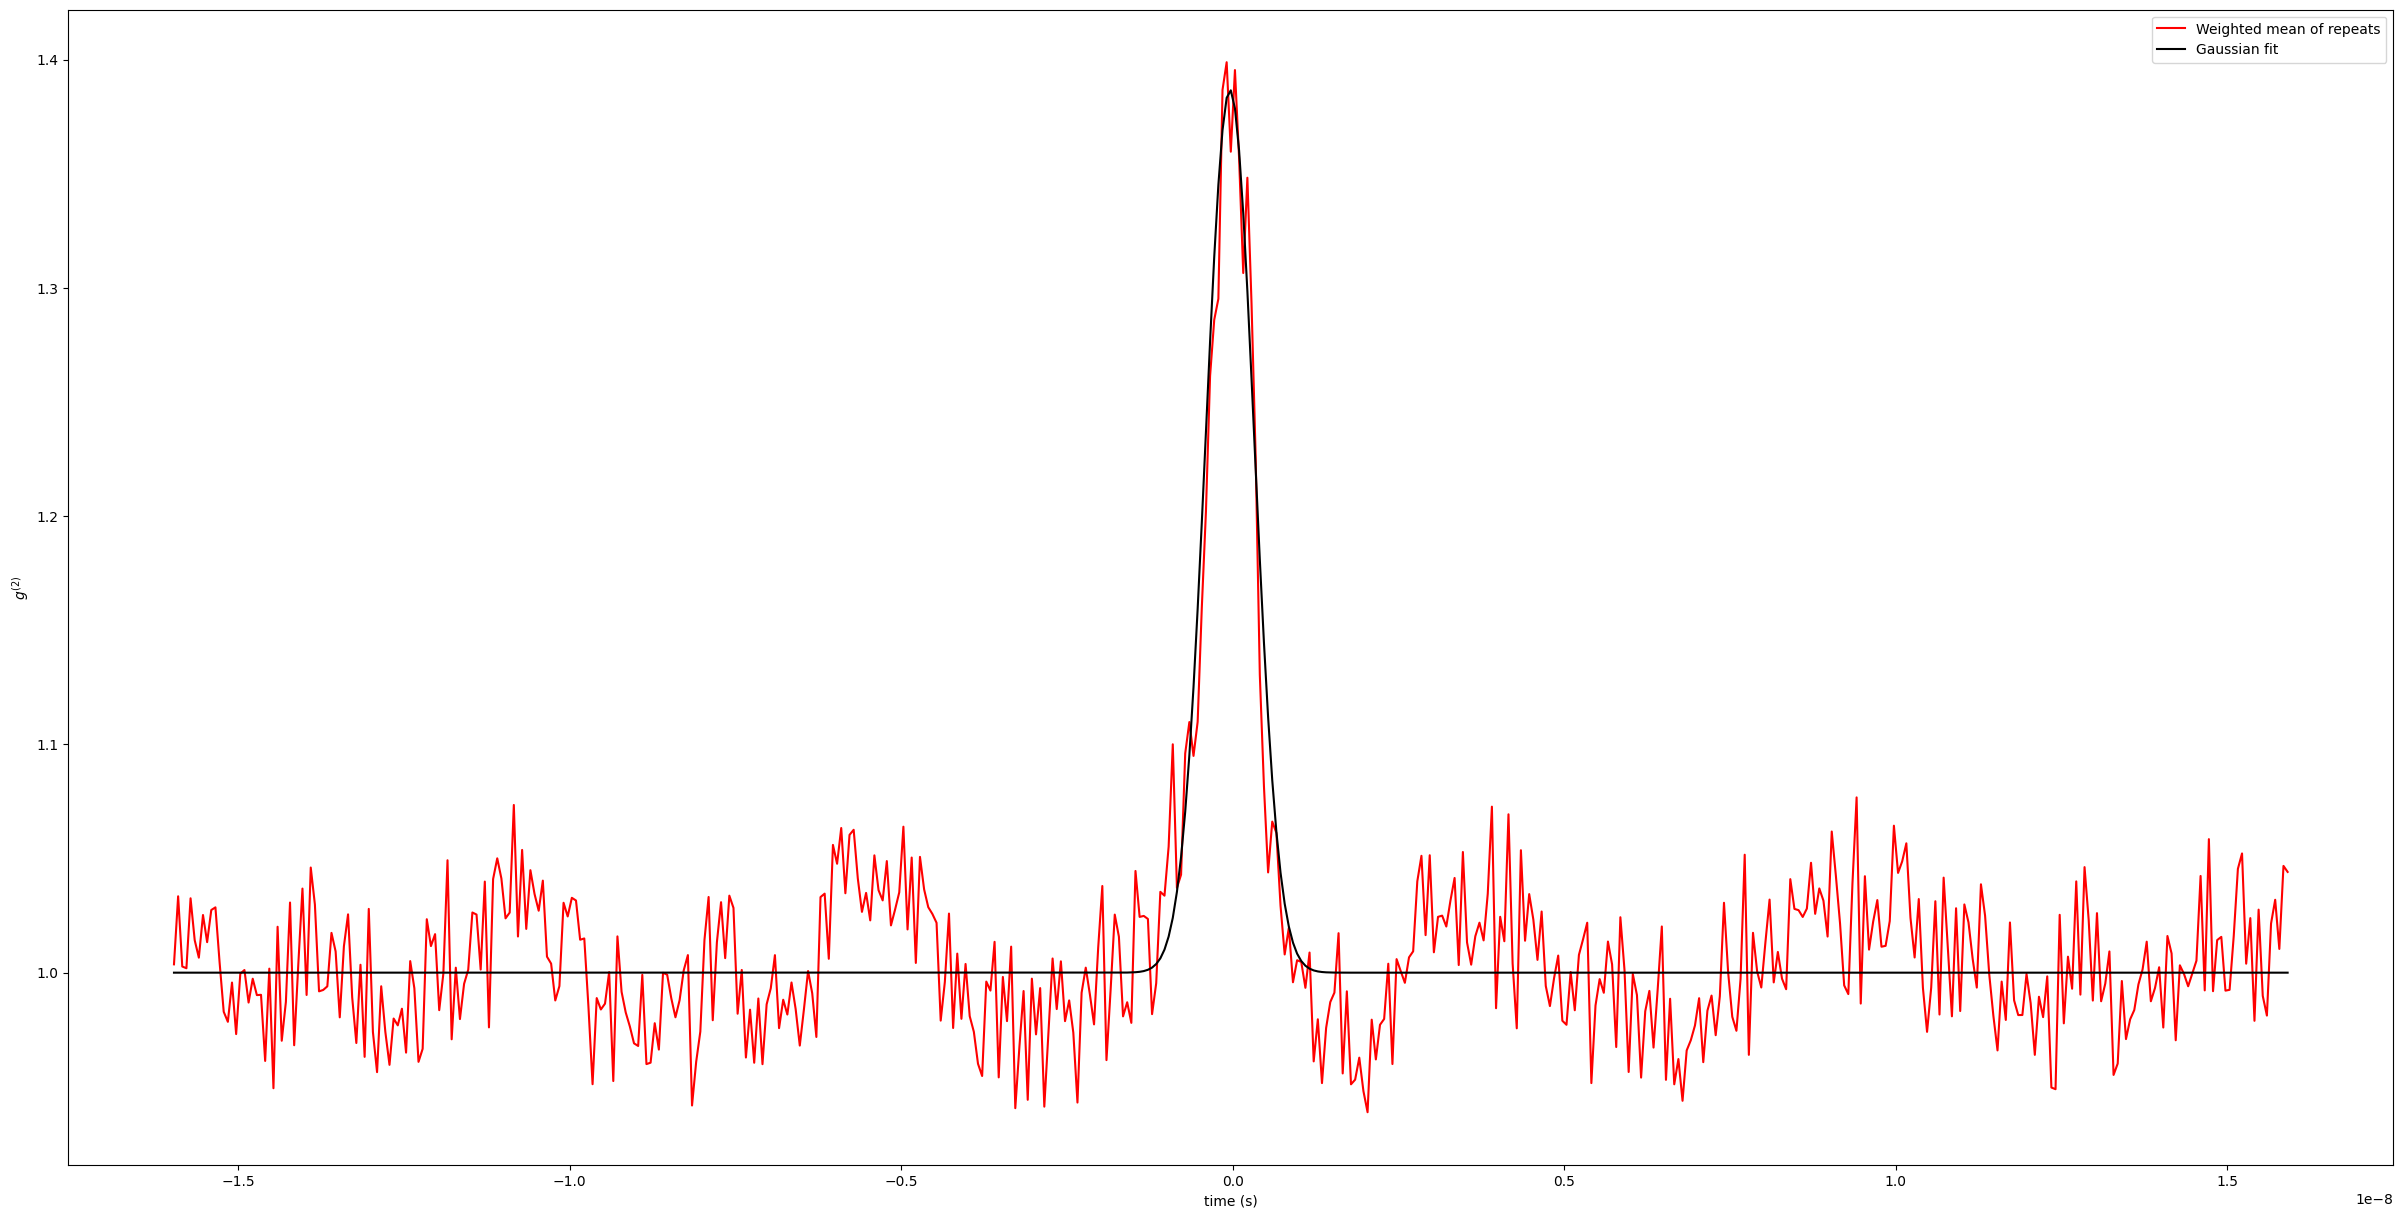

In [9]:
def stdev(values, average, weights):
    variance = np.average((values-average)**2, weights=weights)
    return np.sqrt(variance)

def integrationtime_seconds(time_str):
    h, m, s = map(int, time_str.replace(" h", "").split(":"))
    # Convert to total seconds
    total_seconds = h * 3600 + m * 60 + s
    return total_seconds

integration_time_1_seconds = integrationtime_seconds(integration_time_1)
integration_time_2_seconds = integrationtime_seconds(integration_time_2)
integration_time_3_seconds = integrationtime_seconds(integration_time_3)

G2_means = np.array([np.average([g2_rebinned_1[i], g2_rebinned_2[i], g2_rebinned_3[i]], weights = [integration_time_1_seconds, integration_time_2_seconds, integration_time_3_seconds]) for i in range(511)])
G2_stdev = np.array([stdev(np.array([g2_rebinned_1[i], g2_rebinned_2[i], g2_rebinned_3[i]]), G2_means[i], weights = [integration_time_1_seconds, integration_time_2_seconds, integration_time_3_seconds]) for i in range(511)])
T = T_rebinned_3

plt.plot(T, G2_means, color="red", label="Weighted mean of repeats")

# Gaussian peak fit --------------------------------------------------
p, pcov = fit_gaussian_peak(T, G2_means-1, [.4, -1e-9, 1e-10], sigma=G2_stdev)
print(f"Gaussian fit:\nAmplitude: {p[0]} +- {np.sqrt(pcov[0,0])}\nCentre: {p[1]} +- {np.sqrt(pcov[1,1])}\nStdev: {p[2]} +- {np.sqrt(pcov[2,2])}")
Reduced_Chisq(T, G2_means, G2_stdev, p)
plt.plot(T, gaussian_peak(T, *p)+1, color="black", label="Gaussian fit")

plt.xlabel("time (s)")
plt.ylabel(r"$g^{(2)}$")
plt.legend()
plt.show()

This might look like a substantial Reduced Chi-squared, but it is inflated by much of the background noise when |time| >~2 ns. Theres also some weird periodicity that we also saw in the rubbish dataset, the periodic pattern seems to repeat after ~6ns which corresponds to about 160 MHz. I have no idea what might be causing that

This is the dataset after Alex did minor adjustments to the setup. We chose a bin number of 256 (so that the total bins are 511 for some reason) which is comparable to the previous graphs.<br>
Applying the fit to this dataset yields:

Bin size: 6.274500000000008e-11
Gaussian fit:
Amplitude: 1.6618055383504358 +- 0.025779079492462602
Centre: 1.2847248225313696e-10 +- 5.845537344901167e-12
Stdev: -4.6150584306841776e-10 +- 8.2668382947551e-12
Maximum count of the raw data: 2.912745


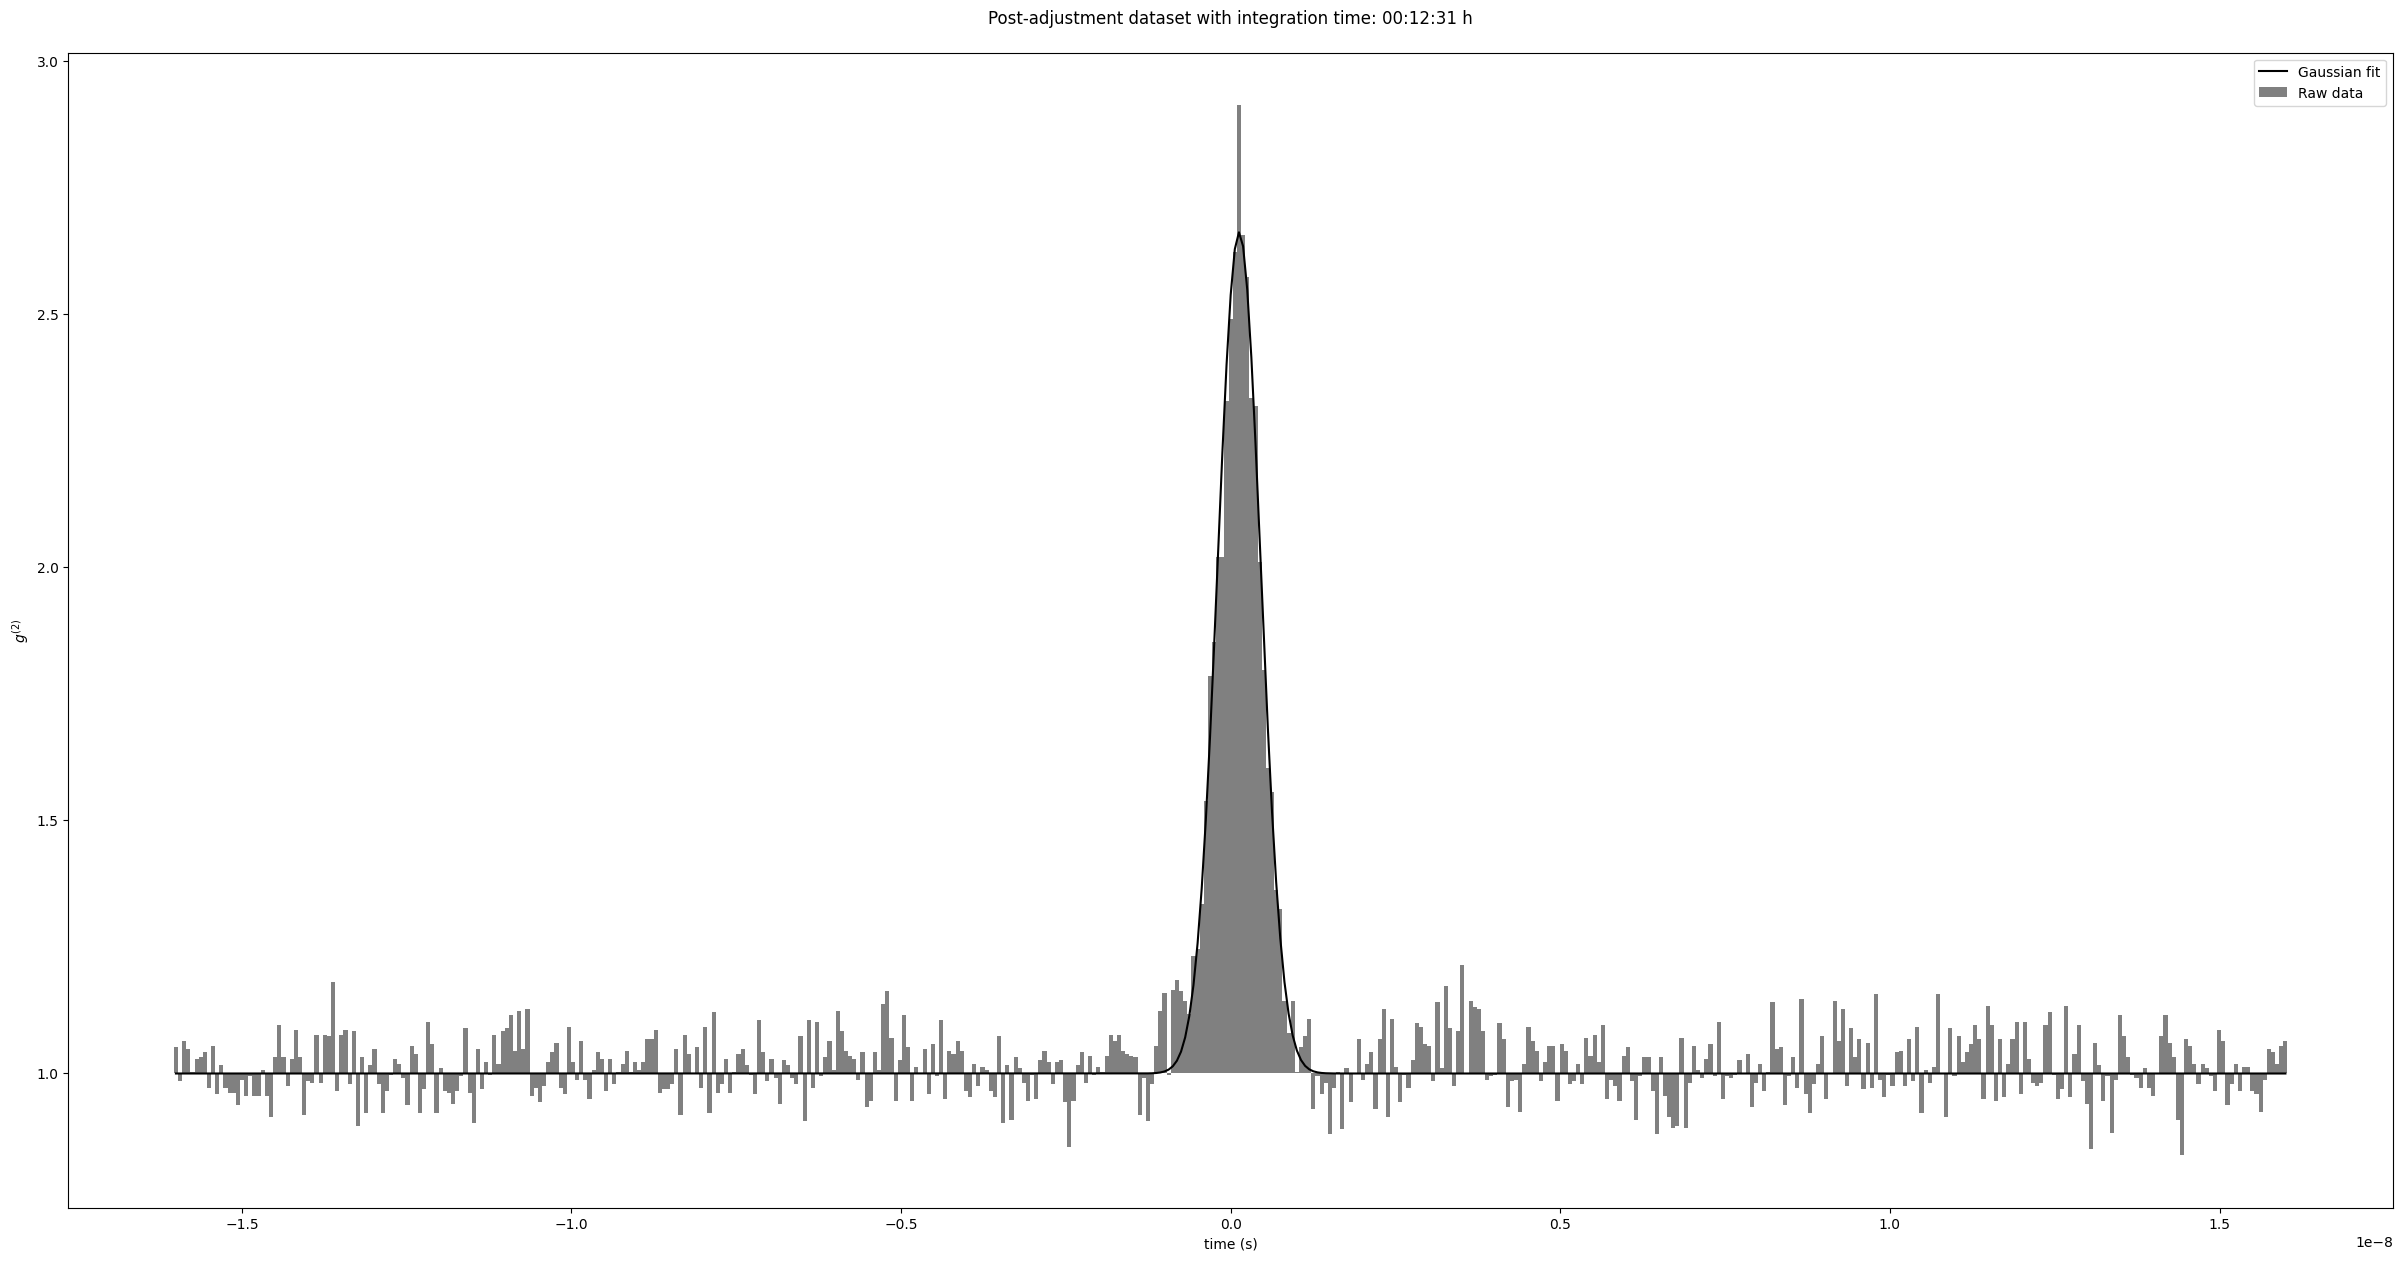

In [10]:
%matplotlib inline
# Skip the comment lines starting with '#' and read the data
g2dataset = pd.read_csv(r"Experiment 1\G2Functions_4.txt", comment='#', sep=';', header=None, names=["T", "G2"])
g2dataset = g2dataset.to_numpy().T
# Get integration time
with open(r"Experiment 1\G2Functions_4.txt") as f:
    lines = f.readlines()
    integration_time = lines[5][17:]
plt.title(f"Post-adjustment dataset with integration time: {integration_time}")

T = g2dataset[0]
g2 = g2dataset[1]
print(f"Bin size: {T[1] - T[0]}")

plt.bar(T, g2-1, T[1] - T[0], bottom=1, label="Raw data", color="grey")

# Gaussian peak fit --------------------------------------------------
p, pcov = fit_gaussian_peak(T, g2-1, [.4, 0, 1e-9])
print(f"Gaussian fit:\nAmplitude: {p[0]} +- {np.sqrt(pcov[0,0])}\nCentre: {p[1]} +- {np.sqrt(pcov[1,1])}\nStdev: {p[2]} +- {np.sqrt(pcov[2,2])}")
plt.plot(T, gaussian_peak(T, *p)+1, color="black", label="Gaussian fit")

print(f"Maximum count of the raw data: {max(g2)}")

plt.xlabel("time (s)")
plt.ylabel(r"$g^{(2)}$")
plt.legend()
plt.show()

Not only is the optical setup obviously significantly better, but the data itself has far less noise meaning the gaussian fits better (as evidenced by the lower relative error).<br>
Perhaps we should use this number of bins for the next bit.

Initial bin number: 2047
New bin size: 6.15846000000024e-11 s
Rebinned peak: g2 = 8.017660571428573, t = -1.466275661904762e-11
Gaussian fit:
Amplitude: 6.807430198671595 +- 0.05219855837767861
Centre: 5.5049886399000254e-11 +- 2.8950180108542656e-12
Stdev: 4.624031310842451e-10 +- 4.094173697921477e-12
Maximum count of the raw data: 11.997304


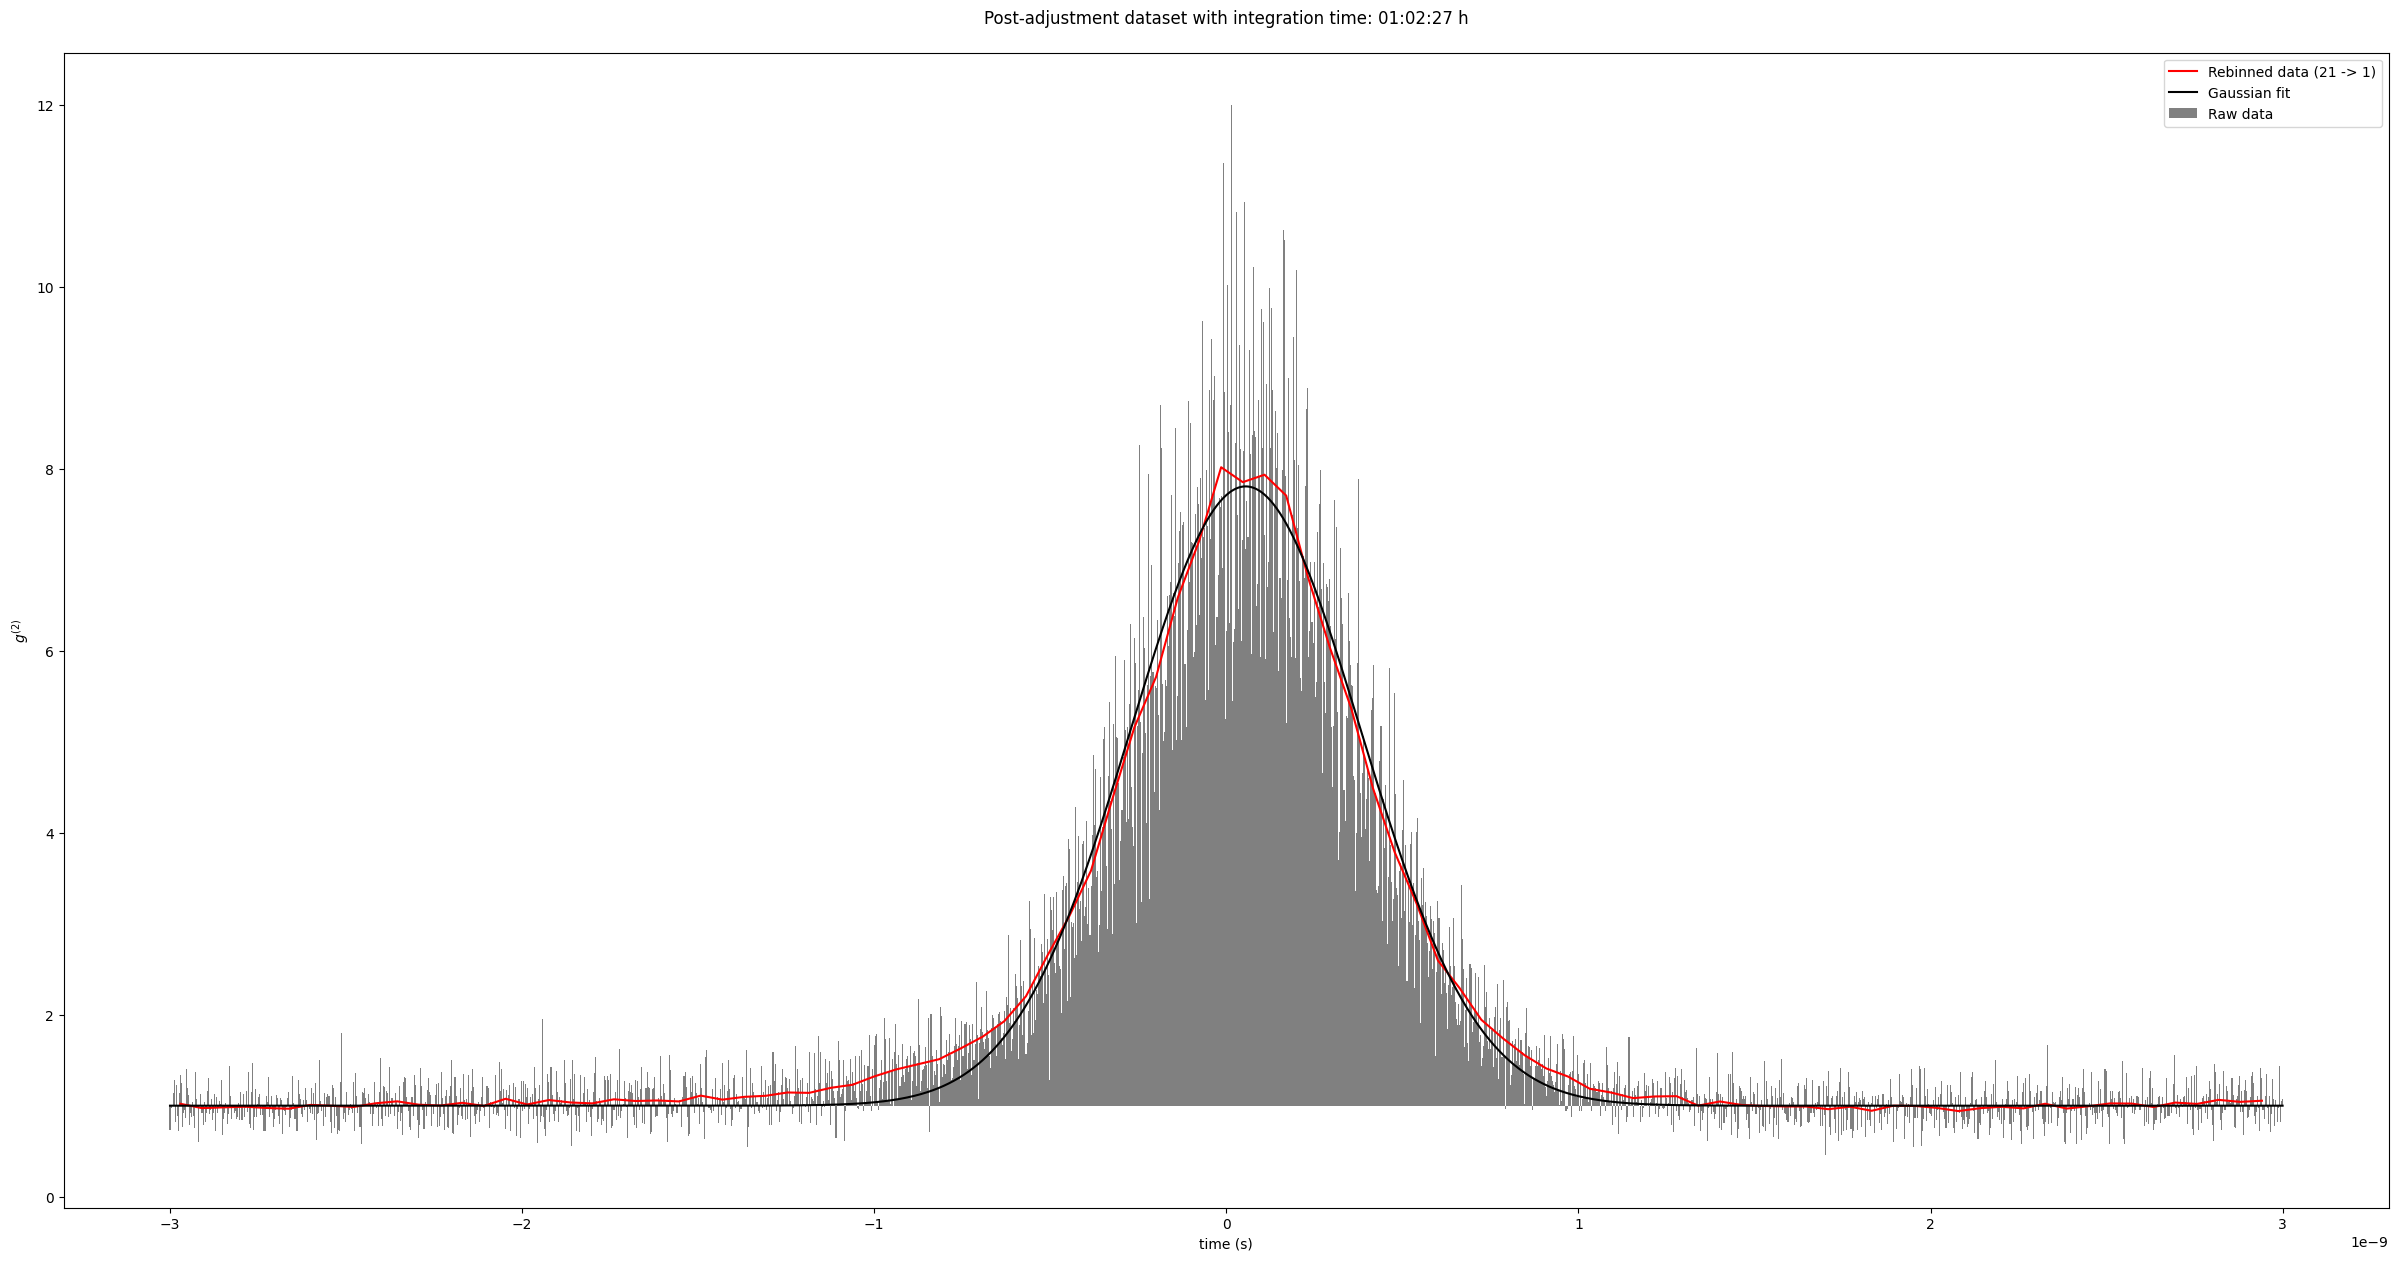

In [11]:
%matplotlib inline
# Skip the comment lines starting with '#' and read the data
g2dataset = pd.read_csv(r"Experiment 1\G2Functions_5.txt", comment='#', sep=';', header=None, names=["T", "G2"])
g2dataset = g2dataset.to_numpy().T
# Get integration time
with open(r"Experiment 1\G2Functions_5.txt") as f:
    lines = f.readlines()
    integration_time = lines[5][17:]
plt.title(f"Post-adjustment dataset with integration time: {integration_time}")

T = g2dataset[0]
g2 = g2dataset[1]
print(f"Initial bin number: {len(T)}")
plt.bar(T, g2-1, T[1] - T[0], bottom=1, label="Raw data", color="grey")

# Rebin data ----------------------------------------------------------
# Rebin to rebin_amount bins
rebin_amount = 21
print(f"New bin size: {rebin_amount*(T[1] - T[0])} s")

# Rebin data
T_rebinned = np.array([sum([T[i+j] for j in range(rebin_amount)]) / rebin_amount for i in range(0, len(T)-(rebin_amount-1), rebin_amount)])
g2_rebinned = np.array([sum([g2[i+j] for j in range(rebin_amount)]) / rebin_amount for i in range(0, len(g2)-(rebin_amount-1), rebin_amount)])

rebinned_peak = find_peaks(g2_rebinned, height = 1.3, prominence=0.1)
print(f"Rebinned peak: g2 = {rebinned_peak[1]['peak_heights'][0]}, t = {T_rebinned[rebinned_peak[0][0]]}")

plt.plot(T_rebinned, g2_rebinned, label=f"Rebinned data ({rebin_amount} -> 1)", color="red")

# Gaussian peak fit --------------------------------------------------
p, pcov = fit_gaussian_peak(T_rebinned, g2_rebinned-1, [7, 0, 1e-9])
print(f"Gaussian fit:\nAmplitude: {p[0]} +- {np.sqrt(pcov[0,0])}\nCentre: {p[1]} +- {np.sqrt(pcov[1,1])}\nStdev: {p[2]} +- {np.sqrt(pcov[2,2])}")
plt.plot(T, gaussian_peak(T, *p)+1, color="black", label="Gaussian fit")

print(f"Maximum count of the raw data: {max(g2)}")

plt.xlabel("time (s)")
plt.ylabel(r"$g^{(2)}$")
plt.legend()
plt.show()

Finally, the latest adjusting yields the best results